In [2]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 9s 2us/step


In [4]:
x_train[0].shape

(28, 28)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

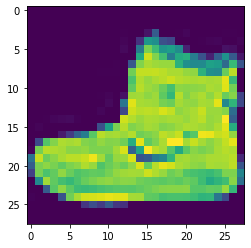

In [7]:
plt.imshow(x_train[0])

In [8]:
x_train.max()

255

In [9]:
x_train=x_train/x_train.max()
x_test=x_test/x_test.max()

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_test.shape

(10000, 28, 28)

In [36]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [15]:
from keras.utils.np_utils import to_categorical

In [16]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [17]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [21]:
y_cat_train=to_categorical(y_train,10)
y_cat_test=to_categorical(y_test,10)


In [25]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [26]:
model=Sequential()

model.add(Conv2D(filters=32,input_shape=(28,28,1),kernel_size=(4,4),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(x_train,y_cat_train,epochs=2,verbose=1)

Epoch 1/2
60000/60000 [==============================] - 49s 820us/step - loss: 0.2865 - accuracy: 0.8970
Epoch 2/2
60000/60000 [==============================] - 50s 827us/step - loss: 0.2447 - accuracy: 0.9114


In [31]:
model.metrics_names

['loss', 'accuracy']

In [37]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 2s 208us/step


[0.2834812988400459, 0.8981000185012817]

In [38]:
from sklearn.metrics import classification_report

In [39]:
predictions=model.predict_classes(x_test)

In [40]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       945
           1       0.97      0.99      0.98       978
           2       0.88      0.79      0.83      1107
           3       0.93      0.88      0.91      1055
           4       0.78      0.87      0.82       891
           5       0.95      0.99      0.97       954
           6       0.73      0.72      0.73      1016
           7       0.98      0.93      0.95      1058
           8       0.98      0.98      0.98      1004
           9       0.95      0.96      0.96       992

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

